In [1]:
import sys
sys.path.append("../")  # 确保根目录在 sys.path 中
from PIL import Image
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import src.postProcess as PostProcess

In [2]:
import react
import numpy as np

In [3]:
import react
import numpy as np
a = react.Simulation(10,10,10,10)
a.testWorld()

World xm: 10 10 10


In [4]:
N = 100
pos = np.random.rand(N, 3).astype(np.double)
vel = np.random.rand(N, 3).astype(np.double)
E = np.random.rand(N).astype(np.double)
id = np.random.randint(N, dtype=np.int32)

In [5]:
pos.shape

(100, 3)

In [6]:
film = np.random.randint(0, 10, size=(10, 10, 10, 5))
index = np.random.randint(0, 10, size=(10, 10, 10, 3))
normal = np.random.rand(10, 10, 10, 3)
objectid = np.random.randint(0, 10, size=(10, 10, 10))

In [7]:
a.inputCell(objectid, index, normal, film)

inputCell: 10 10 10
CellSize: 10 10 10


In [11]:
x,y,z = 1,3,5

print(objectid[x,y,z])
print(index[x,y,z])
print(normal[x,y,z])
print(film[x,y,z])

1
[7 2 2]
[0.02981475 0.92764707 0.23117326]
[8 9 2 8 7]


In [12]:
a.printCell(x, y, z)

Cell[1][3][5].typeID: 1
Cell[1][3][5].index: 7 2 2
Cell[1][3][5].normal: 0.0298147 0.927647 0.231173
Cell[1][3][5].film: 
8 9 2 8 7 


In [10]:
a.inputParticle(pos, vel, E, id)

inputParticle: 100
ParticleSize: 100


In [6]:
pos[10]

array([0.31823497, 0.93883301, 0.47580605])

In [7]:
a.printParticle(10)

particles[10].pos: 0.318235 0.938833 0.475806
particles[10].vel: 0.61934 0.6479 0.34485


In [3]:
react_table_equation = np.array([
    [
        [-1, 1, 0, 0, 0],
        [0, -1, 1, 0, 0],
        [0, 0, -1, 1, 0],
        [0, 0, 0, -1, 0],
        [0, 0, 0, 0, 0]
    ],
    [
        [-1, 0, 0, 0, 0],
        [0, -1, 0, 0, 0],
        [0, 0, -1, 0, 0],
        [0, 0, 0, -1, 0],
        [0, 0, 0, 0, -1]
    ]
])


react_type_table = np.array([[1, 1, 1, 4, 0], # 1: chlorination  # 0: no reaction  # 4: Themal etch
                            [2, 2, 2, 2, 2], # 2 for physics and chemical sputtering
                            [3, 3, 3, 3, 3]])

react_prob_chemical = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
react_yield_p0 = np.array([0.30, 0.30, 0.30, 0.30, 0.30])


rn_coeffcients = np.array([[0.9423, 0.9434, 2.742, 3.026],
                            [0.9620, 0.9608, 2.542, 3.720],
                            [0.9458, 0.9445, 2.551, 3.735],
                            [1.046, 1.046, 2.686, 4.301]])


In [9]:
# a.set_react_prob_chemical(react_prob_chemical)
# a.set_react_type_table(react_type_table)
# a.set_react_table_equation(react_table_equation)
a.set_all_parameters(react_table_equation, react_type_table, react_prob_chemical, react_yield_p0, rn_coeffcients)
a.print_react_table_equation()

react_table_equation 0:
-1 1 0 0 0 
0 -1 1 0 0 
0 0 -1 1 0 
0 0 0 -1 0 
0 0 0 0 0 

react_table_equation 1:
-1 0 0 0 0 
0 -1 0 0 0 
0 0 -1 0 0 
0 0 0 -1 0 
0 0 0 0 -1 



In [4]:
# 读取图像为灰度模式
image = Image.open("./hard_mask_KLA3.jpg").convert("L")
# 转换为 NumPy 数组
HardMasK = np.array(image)

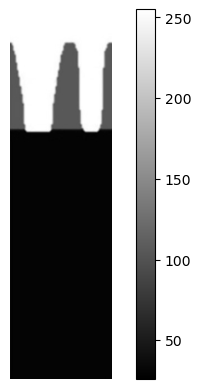

In [5]:
plt.imshow(HardMasK, cmap="gray")  # 指定灰度色彩映射
plt.colorbar()  # 显示颜色条（可选）
# plt.title("Grayscale Image")
plt.axis("off")  # 不显示坐标轴
plt.show()

In [6]:
# Hard mask
film = np.zeros((20, HardMasK.shape[1], HardMasK.shape[0], 5), dtype=np.int32)
density = 20
for i in range(HardMasK.shape[1]):
    for j in range(HardMasK.shape[0]):
        if HardMasK[j, i] < 80: # Si
            film[:, i, -j, 0] = density
        if HardMasK[j, i] >= 80 and HardMasK[j, i] < 120: # HM
            film[:, i, -j, -1] = density

film[:, :, :450, -1] = 0
# film[:, :, :60, -1] = 0
film[:, :, :2, -1] = density

In [7]:
Cell_dtype = np.dtype([
    ('id', np.int32),
    ('index', np.int32, (3,)),
    ('film', np.int32, (5,)),
    ('normal', np.float64, (3,))
], align=True)  # 添加 align=True

cell = np.zeros((20, HardMasK.shape[1], HardMasK.shape[0]), dtype=Cell_dtype)

cell['film'] = film

In [8]:
cell[10, 10:15, 10]['film']

array([[20,  0,  0,  0,  0],
       [20,  0,  0,  0,  0],
       [20,  0,  0,  0,  0],
       [20,  0,  0,  0,  0],
       [20,  0,  0,  0,  0]], dtype=int32)

In [9]:
def scanZ_numpy_bool(film):
    # 初始化一个全零的表面数组
    surface_sparse_depo = np.zeros_like(film, dtype=np.bool_)

    # depo 条件
    current_plane = film != 0

    # 创建邻居布尔索引数组
    neighbors = np.zeros_like(film, dtype=bool)

    # 获取周围邻居的布尔索引
    neighbors[1:, :, :] |= film[:-1, :, :] == 0  # 上面
    neighbors[:-1, :, :] |= film[1:, :, :] == 0  # 下面
    neighbors[:, 1:, :] |= film[:, :-1, :] == 0  # 左边
    neighbors[:, :-1, :] |= film[:, 1:, :] == 0  # 右边
    neighbors[:, :, 1:] |= film[:, :, :-1] == 0  # 前面
    neighbors[:, :, :-1] |= film[:, :, 1:] == 0  # 后面

    # 获取满足条件的索引
    condition_depo = current_plane & neighbors

    # 更新表面稀疏张量
    surface_sparse_depo[condition_depo] = True

    return surface_sparse_depo

def scanZ_vacuum_numpy_bool(film):
    # 初始化一个全零的表面数组
    surface_sparse_depo = np.zeros_like(film, dtype=np.bool_)

    # depo 条件
    current_plane = film == 0

    # 创建邻居布尔索引数组
    neighbors = np.zeros_like(film, dtype=bool)

    # 获取周围邻居的布尔索引
    neighbors[1:, :, :] |= film[:-1, :, :] > 0  # 上面
    neighbors[:-1, :, :] |= film[1:, :, :] > 0  # 下面
    neighbors[:, 1:, :] |= film[:, :-1, :] > 0  # 左边
    neighbors[:, :-1, :] |= film[:, 1:, :] > 0  # 右边
    neighbors[:, :, 1:] |= film[:, :, :-1] > 0  # 前面
    neighbors[:, :, :-1] |= film[:, :, 1:] > 0  # 后面

    # 获取满足条件的索引
    condition_depo = current_plane & neighbors

    # 更新表面稀疏张量
    surface_sparse_depo[condition_depo] = True

    return surface_sparse_depo

def scanZ_underSurface_bool(film):
    # 初始化一个全零的表面数组
    surface_sparse_depo = np.zeros_like(film, dtype=np.bool_)

    # depo 条件
    current_plane = film == 3

    # 创建邻居布尔索引数组
    neighbors = np.zeros_like(film, dtype=bool)

    # 获取周围邻居的布尔索引
    neighbors[1:, :, :] |= film[:-1, :, :] == 1  # 上面
    neighbors[:-1, :, :] |= film[1:, :, :] == 1  # 下面
    neighbors[:, 1:, :] |= film[:, :-1, :] == 1  # 左边
    neighbors[:, :-1, :] |= film[:, 1:, :] == 1  # 右边
    neighbors[:, :, 1:] |= film[:, :, :-1] == 1  # 前面
    neighbors[:, :, :-1] |= film[:, :, 1:] == 1  # 后面

    # 获取满足条件的索引
    condition_depo = current_plane & neighbors

    # 更新表面稀疏张量
    surface_sparse_depo[condition_depo] = True

    return surface_sparse_depo

def get_normal_from_index( film_label_index_normal_mirror, film_label_index_normal, mirrorGap, point):
    x, y, z = point
    x += mirrorGap
    y += mirrorGap
    grid_cube = film_label_index_normal_mirror[x-3:x+4, y-3:y+4, z-3:z+4]

    plane_bool = grid_cube[:, :, :, 0] == 1
    positions = grid_cube[plane_bool][:, 1:4]

    xmn = np.mean(positions[:, 0])
    ymn = np.mean(positions[:, 1])
    zmn = np.mean(positions[:, 2])
    c = positions - np.stack([xmn, ymn, zmn])
    cov = np.dot(c.T, c)

    # SVD 分解协方差矩阵
    u, s, vh = np.linalg.svd(cov)

    # 最小特征值对应的特征向量
    normal = u[:, -1]  # 最小特征值的特征向量是最后一列

    x -= mirrorGap
    y -= mirrorGap
    film_label_index_normal[x, y, z, -3:] = normal
    return film_label_index_normal

def update_surface_mirror(surface_etching,surface_etching_mirror, mirrorGap, cellSizeX, cellSizeY):
    surface_etching_mirror[mirrorGap:mirrorGap+cellSizeX, mirrorGap:mirrorGap+cellSizeY, :] = surface_etching
    surface_etching_mirror[:mirrorGap, mirrorGap:mirrorGap+cellSizeY, :] = surface_etching[-mirrorGap:, :, :]
    surface_etching_mirror[-mirrorGap:, mirrorGap:mirrorGap+cellSizeY, :] = surface_etching[:mirrorGap, :, :]
    surface_etching_mirror[mirrorGap:mirrorGap+cellSizeX, :mirrorGap, :] = surface_etching[:, -mirrorGap:, :]
    surface_etching_mirror[mirrorGap:mirrorGap+cellSizeX:, -mirrorGap:, :] = surface_etching[:, :mirrorGap, :]
    surface_etching_mirror[:mirrorGap, :mirrorGap, :] = surface_etching[-mirrorGap:, -mirrorGap:, :]
    surface_etching_mirror[:mirrorGap, -mirrorGap:, :] = surface_etching[-mirrorGap:, :mirrorGap, :]
    surface_etching_mirror[-mirrorGap:, :mirrorGap, :] = surface_etching[:mirrorGap, -mirrorGap:, :]
    surface_etching_mirror[-mirrorGap:, -mirrorGap:, :] = surface_etching[:mirrorGap, :mirrorGap, :]
    
    return surface_etching_mirror

def build_film_label_index_normal( sumfilm, mirrorGap):
    surface_film = scanZ_numpy_bool(sumfilm)
    vacuum_film = scanZ_vacuum_numpy_bool(sumfilm)

    film_label = np.zeros_like(sumfilm)

    solid_mask = sumfilm != 0
    film_label[solid_mask] = 3
    film_label[surface_film] = 1
    undersurface_film = scanZ_underSurface_bool(film_label)
    film_label[undersurface_film] = 2
    film_label[vacuum_film] = -1

    film_label_index_normal = np.zeros((film_label.shape[0], film_label.shape[1], film_label.shape[2], 7))

    for i in range(film_label_index_normal.shape[0]):
        for j in range(film_label_index_normal.shape[1]):
            for k in range(film_label_index_normal.shape[2]):
                film_label_index_normal[i, j, k, 0] = film_label[i, j, k]
                film_label_index_normal[i, j, k, 1] = i
                film_label_index_normal[i, j, k, 2] = j
                film_label_index_normal[i, j, k, 3] = k

    cellSizeX, cellSizeY, cellSizeZ = sumfilm.shape
    film_label_index_normal_mirror = np.zeros((cellSizeX+int(mirrorGap*2), cellSizeY+int(mirrorGap*2), cellSizeZ, 7))
    film_label_index_normal_mirror = update_surface_mirror(film_label_index_normal, film_label_index_normal_mirror, mirrorGap, cellSizeX, cellSizeY)

    surface_point = np.array(np.where(film_label_index_normal[:, :, :, 0] == 1)).T

    print(surface_point.shape)
    for i in range(surface_point.shape[0]):
        # print(surface_point[i])
        film_label_index_normal = get_normal_from_index(film_label_index_normal_mirror, film_label_index_normal, mirrorGap, surface_point[i])
    return film_label_index_normal

In [10]:
sumFilm = np.sum(film, axis=-1)
mirrorGap = 3
cellSizeX, cellSizeY, cellSizeZ = sumFilm.shape
film_label_index_normal = build_film_label_index_normal(sumFilm, mirrorGap)
film_label_index_normal_mirror = np.zeros((cellSizeX+int(mirrorGap*2), cellSizeY+int(mirrorGap*2), cellSizeZ, 7))
film_label_index_normal_mirror = update_surface_mirror(film_label_index_normal, film_label_index_normal_mirror, mirrorGap, cellSizeX, cellSizeY)


(14540, 3)


In [11]:
film_mirror = np.zeros((film.shape[0]+int(mirrorGap*2), film.shape[1]+int(mirrorGap*2), film.shape[2], film.shape[3]))
film_mirror= update_surface_mirror(film, film_mirror, mirrorGap, cellSizeX, cellSizeY)

In [12]:
cell = np.zeros((film_label_index_normal_mirror.shape[0], 
                 film_label_index_normal_mirror.shape[1], 
                 film_label_index_normal_mirror.shape[2]), dtype=Cell_dtype)

cell['id'] = film_label_index_normal_mirror[:,:,:,0]
cell['normal'] = film_label_index_normal_mirror[:,:,:,-3:]
cell['film'] = film_mirror
cell['index'] = film_label_index_normal_mirror[:,:,:,1:4]

In [13]:
print(cell['film'].shape)
print(cell['id'].shape)
print(cell['normal'].shape)
print(cell['index'].shape)

(26, 190, 670, 5)
(26, 190, 670)
(26, 190, 670, 3)
(26, 190, 670, 3)


In [14]:
cell['film']

array([[[[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        ...,

        [[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         

In [15]:
simulation = react.Simulation(42, 26, 190, 670)

In [9]:
film = np.random.randint(0, 10, size=(10, 10, 10, 5))
index = np.random.randint(0, 10, size=(10, 10, 10, 3))
normal = np.random.rand(10, 10, 10, 3)
objectid = np.random.randint(0, 10, size=(10, 10, 10))

In [8]:
normal.shape

(10, 10, 10, 3)

In [16]:
cell['film']

array([[[[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        ...,

        [[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[ 0,  0,  0,  0, 20],
         [20,  0,  0,  0, 20],
         [20,  0,  0,  0,  0],
         ...,
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         

In [ ]:
simulation.inputCell(cell['id'], cell['index'], cell['normal'], cell['film'])

: 

In [17]:
simulation.runSimulation()

World xm: 26 190 670
World Cell: 26 190 670


In [18]:
outputNormal = simulation.normal_to_numpy()

In [19]:
outputNormal.shape

(26, 190, 670, 3)

In [20]:
outputCell = simulation.getCells()

In [21]:
len(outputCell)

26

In [22]:
type(outputCell)

list

In [23]:
outputCell[1][0]

[Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),
 Cell(id=3),

In [24]:
outputCell[1][0][0].id

3

In [25]:
react.inputCell(cell)

inputCell:26_190_670


In [26]:
from numba import jit, prange

@jit(nopython=True)
def transfer_to_plane(film_label_index_normal):
    plane = np.zeros((film_label_index_normal.shape[0]*film_label_index_normal.shape[1]*film_label_index_normal.shape[2], 6))
    count = 0
    for i in range(film_label_index_normal.shape[0]):
        for j in range(film_label_index_normal.shape[1]):
            for k in range(film_label_index_normal.shape[2]):
                if film_label_index_normal[i,j,k]['id'] == 1:
                    plane[count, :3] = film_label_index_normal[i,j,k]['normal']
                    plane[count, 3:6] = i, j, k
                    count += 1
    return plane[:count]

@jit(nopython=True)
def layerLoop(film):
    layer = np.zeros((film.shape[0],film.shape[1],film.shape[2]))
    for i in range(film.shape[0]):
        for j in range(film.shape[1]):
            for k in range(film.shape[2]):
                for c in range(film.shape[3]):
                    if np.sum(film[i, j, k]) > 0:
                        layer[i, j, k] = np.argmax(film[i, j, k]) + 1 
    return layer    

color_names = ['dimgray', 'blue', 'red', 'green','cyan', 'black', 'white','yellow', 'brown', 'magenta', 'orange', 'purple', 'pink', 'gray']
labels = ['Si', 'SiCl1', 'SiCl2', 'SiCl3', 'mask']

geom = pv.Box()
p = pv.Plotter()

layer =layerLoop(cell['film'])

for ci in range(cell['film'].shape[3]):
    layerCube = np.argwhere(layer == ci+1)
    if layerCube.size != 0:
        layermesh = pv.PolyData(layerCube)
        layermesh["radius"] = np.ones(layerCube.shape[0])*0.5
        layerglyphed = layermesh.glyph(scale="radius", geom=geom, orient=False) # progress_bar=True)
        p.add_mesh(layerglyphed, color=color_names[ci], label=labels[ci],opacity=0.7)

plane = transfer_to_plane(cell)

point_cloud = pv.PolyData(plane[:, 3:6])
vectors = plane[:, :3]

point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(
    orient='vectors',
    scale=10000,
    factor=3,
)

p.add_mesh(point_cloud, color='cyan', point_size=5.0, render_points_as_spheres=True)
p.add_mesh(arrows, color='lightblue', opacity= 0.1)

p.enable_eye_dome_lighting()
p.add_legend()
p.show()

/home/ysy/.local/lib/python3.10/site-packages/pyvista/core/utilities/points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:36535/index.html?ui=P_0x7fdb703e16c0_0&reconnect=auto" class="pyvi…

In [30]:
color_names = ['dimgray', 'blue', 'red', 'green','cyan', 'black', 'white','yellow', 'brown', 'magenta', 'orange', 'purple', 'pink', 'gray']
labels = ['Si', 'SiCl1', 'SiCl2', 'SiCl3', 'mask']
PostProcess.PostProcess_multiLayer(cell['film'], colors=color_names, labels=labels)

/home/ysy/.local/lib/python3.10/site-packages/pyvista/core/utilities/points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:38063/index.html?ui=P_0x7f647b8f3e80_5&reconnect=auto" class="pyvi…

In [31]:
import react

In [32]:
react.inputCell(cell)

RuntimeError: NumPy type info missing for 4Cell